In [1]:
from sympy import *
import numpy as np
init_printing()

Symbols
----

In [2]:
H, Hx, Hy, Hz = symbols('H, H_x, H_y, H_z')
E, Ex, Ey, Ez = symbols('E, E_x, E_y, E_z')
k, kx, ky, kz = symbols('k, k_x, k_y, k_z')
c, w, Eps_par, Eps_per = symbols('c, \omega, \epsilon_\parallel, \epsilon_\perp')

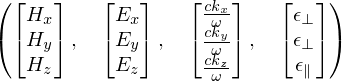

In [38]:
H = Matrix([
        Hx,
        Hy,
        Hz
    ])
E = Matrix([
        Ex,
        Ey,
        Ez
    ])
k = Matrix([
        kx,
        ky,
        kz
    ])
q = (c/w)*k
Eps = Matrix([
        Eps_per,
        Eps_per,
        Eps_par
    ])
H, E, q, Eps

Maxwell Equations
--

In [39]:
rotE = Eq(q.cross(E), H)

In [40]:
rotH = Eq(q.cross(H), E.multiply_elementwise(Eps))

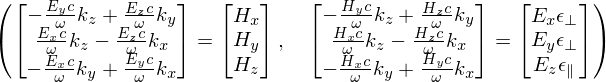

In [41]:
rotE, rotH

Simple
---
$k_y = 0$


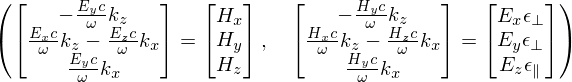

In [42]:
rotE.subs({ky:0}), rotH.subs({ky:0})

Ordinary Wave
---
$E_x = 0$

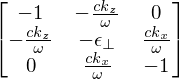

In [86]:
MaxwellMatrix = Matrix([
        [-1, -q[2], 0],
        [-q[2], -Eps_per, q[0]],
        [0, q[0], -1]
])
MaxwellMatrix

In [87]:
Sol = solve(Eq(MaxwellMatrix.det(), 0), Eps_per)[0]

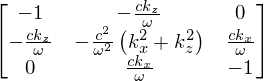

In [94]:
MaxwellMatrix = MaxwellMatrix.subs({Eps_per:Sol})
MaxwellMatrix

In [95]:
FieldVars = Matrix([
        Hx,
        Ey,
        Hz
    ])

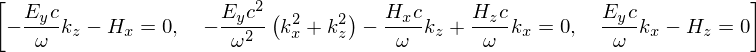

In [96]:
equations = [Eq(MaxwellMatrix.dot(FieldVars)[0], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[1], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[2], 0)
             ]
equations

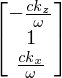

In [97]:
Solution = solve([equations[0], equations[2]], [Hx, Hz])
OrdinaryPolarization = (Matrix([
        Solution[Hx],
        Ey,
        Solution[Hz] 
    ]))/Ey
OrdinaryPolarization

Extraordinary Wave
---
$E_y = 0$

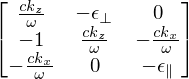

In [123]:
MaxwellMatrix = Matrix([
        [q[2], -Eps_per, 0],
        [-1, q[2], -q[0]],
        [-q[0], 0, -Eps_par]
])
MaxwellMatrix

In [124]:
Sol_per = solve(Eq(MaxwellMatrix.det(), 0), Eps_per)[0]
Sol_par = solve(Eq(MaxwellMatrix.det(), 0), Eps_par)[0]

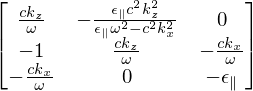

In [125]:
MaxwellMatrix = MaxwellMatrix.subs({Eps_per:Sol_per})
MaxwellMatrix

In [126]:
FieldVars = Matrix([
        Hy,
        Ex,
        Ez
    ])

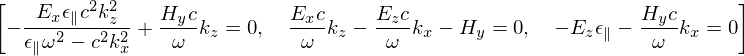

In [127]:
equations = [Eq(MaxwellMatrix.dot(FieldVars)[0], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[1], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[2], 0)
             ]
equations

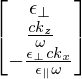

In [131]:
Solution = solve([equations[0], equations[2]], [Ex, Ez])
ExtraordinaryPolarization = simplify(Matrix([
            Hy,
            Solution[Ex].subs({Eps_par:Sol_par}),
            Solution[Ez] 
    ])*Eps_per/Hy)
ExtraordinaryPolarization

Eigenmodes
--

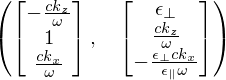

In [133]:
OrdinaryPolarization, ExtraordinaryPolarization